# 어떤 고객들이 떠나가고 있는가?
#### 게임 개발 회사 A기업의 유저수가 줄고 있음. 94,185명에서 76,175명으로 감소함
- 광고: 지난 달과 비교했을 때 광고 집행은 변함이 없음
- 기획: 매주, 매월 시행하고 있는 게임 속 이벤트 역시 변함이 없음
#### 이유가 무엇일까?
![](1-1.jpg)
#### 유력가설: 성별 혹은 연령 등 특정 유저 층에서 탈퇴한 유저가 많다.
#### 해결책: 성별 연령별로 유저 변화수를 살펴보자.

## 1. Loading data

#### 1) 필요한 라이브러리들을 호출

In [2]:
#데이터 분석에 필요한 패키지들을 파이썬으로 호출
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### 2) 각 변수별로 데이터 할당 

In [4]:
# 데이터 불러오기
dau = pd.read_csv("dau.csv")
user = pd.read_csv("user_info.csv")

![](1-2.jpg)

#### 3) 호출된 데이터 정보 확인

In [6]:
# 로그인해서 활동하는 날 생기는 로그 데이터
dau

,log_date,app_name,user_id
0,2017-08-01,game-01,33754
1,2017-08-01,game-01,28598
2,2017-08-01,game-01,30306
3,2017-08-01,game-01,117
4,2017-08-01,game-01,6605
5,2017-08-01,game-01,346
6,2017-08-01,game-01,28601
7,2017-08-01,game-01,123
8,2017-08-01,game-01,33446
9,2017-08-01,game-01,31685


In [12]:
# 가입한 사용자정보 데이터
user.tail(6)

,install_date,app_name,user_id,gender,generation,device_type
49520,2017-09-30,game-01,49521,M,40,iOS
49521,2017-09-30,game-01,49522,F,20,iOS
49522,2017-09-30,game-01,49523,F,20,iOS
49523,2017-09-30,game-01,49524,F,30,iOS
49524,2017-09-30,game-01,49525,F,20,iOS
49525,2017-09-30,game-01,49526,M,20,Android


# 2. Data cleaning

#### 1) 각 데이터들을 결합

In [13]:
# Dau 데이터에 user 데이터를 결합하기
DauUser = dau.merge(user, on=["user_id", "app_name"])

#### 2)월별 정렬을 위한 문자 처리

In [19]:
DauUser["log_month"].str[0:7]

0         2017-08
1         2017-08
2         2017-08
3         2017-08
4         2017-08
5         2017-08
6         2017-08
7         2017-08
8         2017-08
9         2017-08
10        2017-08
11        2017-08
12        2017-08
13        2017-08
14        2017-08
15        2017-09
16        2017-09
17        2017-09
18        2017-09
19        2017-09
20        2017-09
21        2017-09
22        2017-09
23        2017-09
24        2017-09
25        2017-09
26        2017-09
27        2017-09
28        2017-09
29        2017-09
           ...   
170368    2017-09
170369    2017-09
170370    2017-09
170371    2017-09
170372    2017-09
170373    2017-09
170374    2017-09
170375    2017-09
170376    2017-09
170377    2017-09
170378    2017-09
170379    2017-09
170380    2017-09
170381    2017-09
170382    2017-09
170383    2017-09
170384    2017-09
170385    2017-09
170386    2017-09
170387    2017-09
170388    2017-09
170389    2017-09
170390    2017-09
170391    2017-09
170392    

In [26]:
#일자 데이터 중 '월'을 떼어내 별도의 열로 저장
DauUser["log_month"] = DauUser["log_date"].str[0:7]

# 3. Data analysis

#### 1)크로스 집계를 이용한 분석

#### 성별에 따른 접속 일자 

In [30]:
pd.crosstab(DauUser["log_month"], DauUser["gender"])

gender,F,M
log_month,,
2017-08,47358,46849
2017-09,38041,38150


#### 연령에 따른 접속일자

In [29]:
pd.crosstab(DauUser["log_month"], DauUser["generation"])
#20대에서 3000명, 30대에서 6000명 정도 이탈함.

generation,10,20,30,40,50
log_month,,,,,
2017-08,18786,33682,28080,8830,4829
2017-09,15392,27241,22229,7494,3835


#### 성별-연령에 따른 접속일자 - 첫 번째 방법

In [32]:
pd.crosstab(DauUser["log_month"], [DauUser["gender"],DauUser["generation"]])

gender         F                               M                          
generation    10     20     30    40    50    10     20     30    40    50
log_month                                                                 
2017-08     9091  17192  14219  4599  2257  9695  16490  13861  4231  2572
2017-09     7316  13628  11460  3856  1781  8076  13613  10769  3638  2054

#### 디바이스 유형에 따른 접속일자

In [36]:
pd.crosstab(DauUser["log_month"], DauUser["device_type"])

device_type,Android,iOS
log_month,,
2017-08,46990,47217
2017-09,29659,46532


# 4. Data Visualization

#### 1) 디바이스 유형별 접속일자의 시각화 - 라인 그래프

In [40]:
data = pd.crosstab(DauUser["log_date"], DauUser["device_type"])

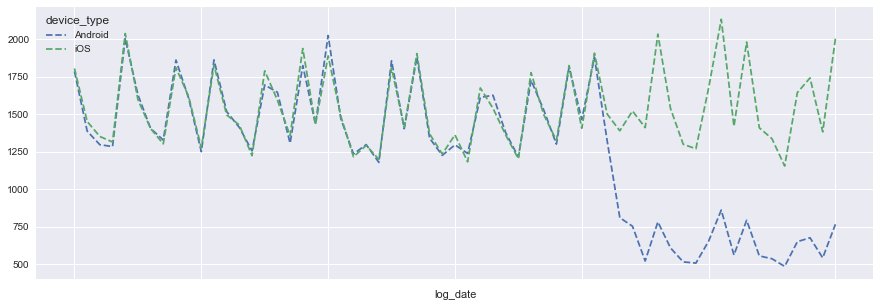

In [41]:
graph = pd.DataFrame(data)
graph.plot.line(figsize=(15,5), style='--')

#### 2) 디바이스 유형별 접속일자의 시각화 - Heat Map

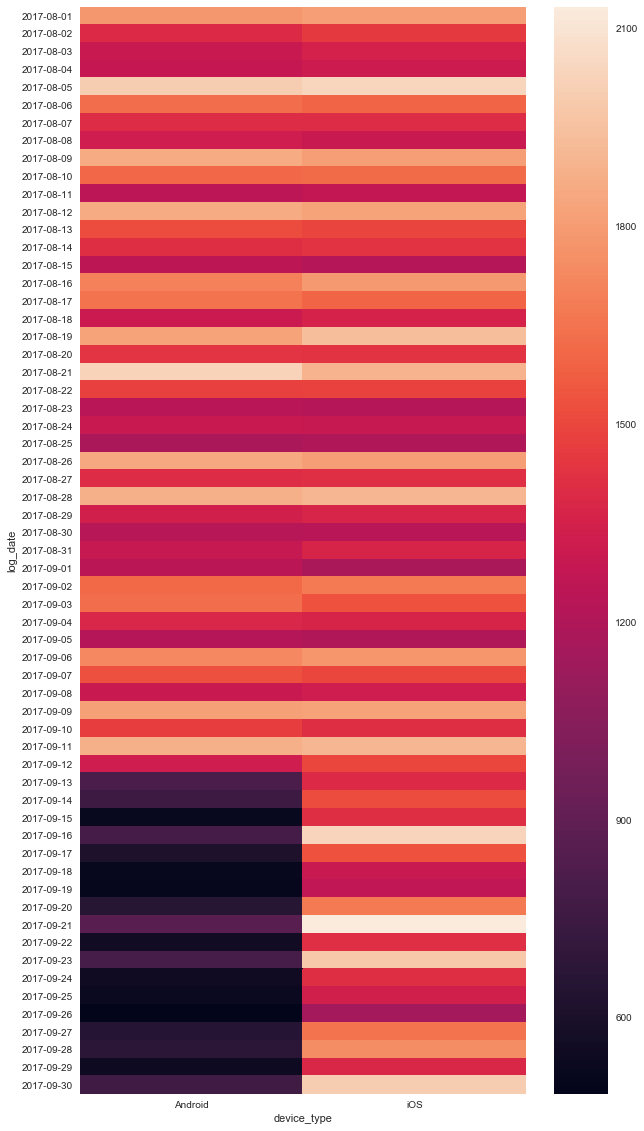

In [42]:
sns.set(rc={"figure.figsize": (10,20)})
sns.heatmap(data)

#### 9월 초 iOS에 비해 Android에 큰 변화를 준 무엇(?)인가 발생함.
#### 관련 팀에 문제가 있었는지 확인해봐야 함.